In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
manip1 = ExperimentClass.Experiment("20240319_NPQ_lincomycin_long", "SpeedZen")
manip2 = ExperimentClass.Experiment("20240319_NPQ_lincomycin_relaxation", "SpeedZen")
manip2.Data.rename(columns = {"E31" : "E11", "E32": "E12", "E33": "E13", "E34": "E14", "E35": "E15", "E36": "E16", "E37": "E17", "E38": "E18"}, inplace = True)
manip2.Time = manip2.Time + manip1.Time.iloc[-1] + (30*60*1000)

C:\Users\Orlando\AppData\Local\Temp\ipykernel_16440\3693628241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manip2.Data.rename(columns = {"E31" : "E11", "E32": "E12", "E33": "E13", "E34": "E14", "E35": "E15", "E36": "E16", "E37": "E17", "E38": "E18"}, inplace = True)


In [3]:
normalising_vector = []
for col in manip1.Data.columns:
    normalising_vector.append(manip1.Data[col][6])
manip1.Data = manip1.Data.div(normalising_vector, axis=1)
manip2.Data = manip2.Data.div(normalising_vector, axis=1)

manip1.annotations

,E,souche,added_linc_uL,actinic_light,illumination,experiment
0,11,stt7A6,0.00,740,0,0
1,12,stt7A6,0.00,740,0,0
2,13,stt7A6,0.00,740,0,0
3,14,stt7A6,0.00,740,0,0
4,15,stt7A6,0.75,740,0,0
5,16,stt7A6,0.75,740,0,0
6,17,stt7A6,0.75,740,0,0
7,18,stt7A6,0.75,740,0,0


In [4]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax



In [5]:
time_Fstat = []
time_Fmax = []
Fstat = []
Fmax = []
Phi_PSII = []
NPQ = []
for recor in manip1.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip1.Time, manip1.Data[f"E{recor}"])
    time_Fstat.append(aux_time_Fstat)
    Fstat.append(aux_Fstat)
    time_Fmax.append(aux_time_Fmax)
    Fmax.append(aux_Fmax)
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip2.Time, manip2.Data[f"E{recor}"])
    time_Fstat[-1] = time_Fstat[-1].append(aux_time_Fstat)
    Fstat[-1] = Fstat[-1].append(aux_Fstat)
    time_Fmax[-1] = time_Fmax[-1].append(aux_time_Fmax)
    Fmax[-1] = Fmax[-1].append(aux_Fmax)
    Phi_PSII.append((Fmax[-1].values-Fstat[-1].values)/Fmax[-1].values)
    NPQ.append((Fmax[-1].values[0]-Fmax[-1].values)/Fmax[-1].values)
    



C:\Users\Orlando\AppData\Local\Temp\ipykernel_16440\1558778183.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_Fstat[-1] = time_Fstat[-1].append(aux_time_Fstat)
C:\Users\Orlando\AppData\Local\Temp\ipykernel_16440\1558778183.py:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fstat[-1] = Fstat[-1].append(aux_Fstat)
C:\Users\Orlando\AppData\Local\Temp\ipykernel_16440\1558778183.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_Fmax[-1] = time_Fmax[-1].append(aux_time_Fmax)
C:\Users\Orlando\AppData\Local\Temp\ipykernel_16440\1558778183.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Fmax[-1] = Fmax[-1].append(au

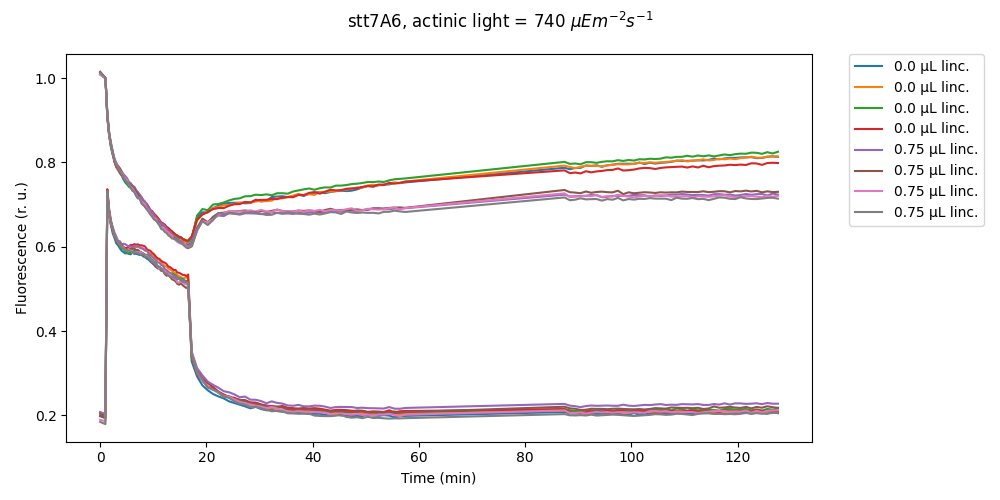

In [6]:
#souches = ["stt7A6", "stt7A20", "WT4A", "t222"]
souches = ["stt7A6"]
experiment = 0
illumination = 0

for i, k in enumerate(souches):
    records = list(manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment) & (manip2.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"{k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$")
    for j, record in enumerate(records):
        index = manip2.annotations[manip2.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize = 2, label = f'{manip2.annotations[manip2.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize = 2, color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluorescence (r. u.)")
    fig.tight_layout()
    fig.savefig(manip2.fig_folder + f"/{k}_{light}µE_{illumination}.png", dpi = 300)
    

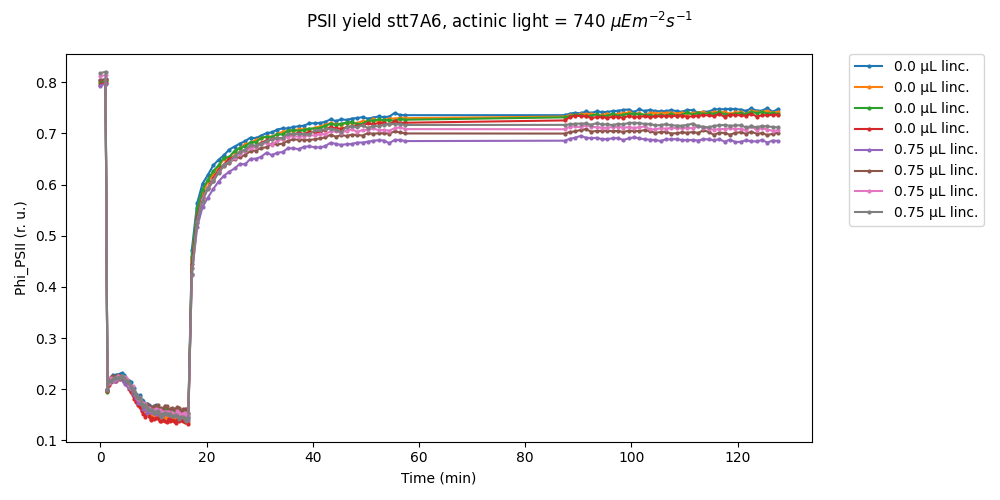

In [7]:
souches = ["stt7A6"]
experiment = 0
illumination = 0

for i, k in enumerate(souches):
    records = list(manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment) & (manip2.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"PSII yield {k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$")
    for j, record in enumerate(records):
        index = manip2.annotations[manip2.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Phi_PSII[index], 'o-', markersize = 2, label = f'{manip2.annotations[manip2.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Phi_PSII (r. u.)")
    fig.tight_layout()
    fig.savefig(manip2.fig_folder + f"/phi_PSII_{k}_{light}µE_{illumination}.png", dpi = 300)

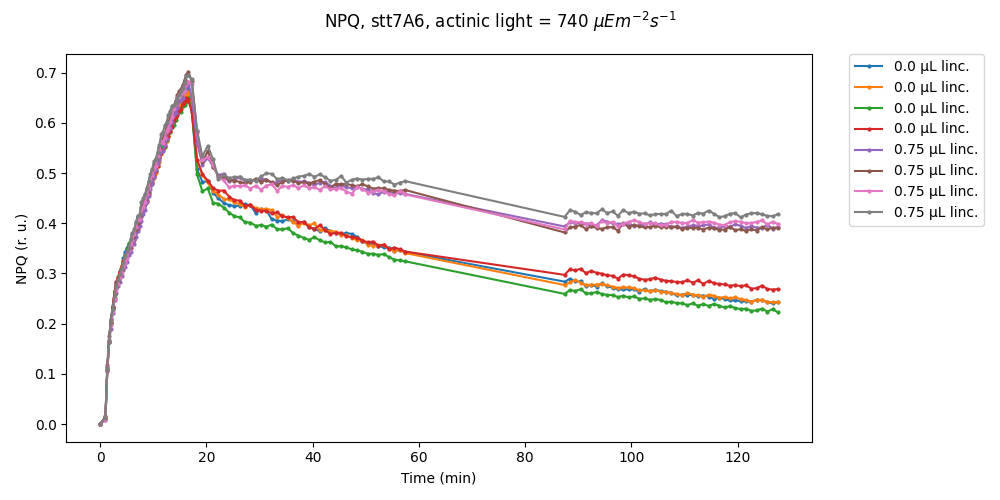

In [8]:
souches = ["stt7A6"]
experiment = 0
illumination = 0

for i, k in enumerate(souches):
    records = list(manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment) & (manip2.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip2.annotations[(manip2.annotations.souche == souches[i]) & (manip2.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"NPQ, {k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$")
    for j, record in enumerate(records):
        index = manip2.annotations[manip2.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], NPQ[index], 'o-', markersize = 2, label = f'{manip2.annotations[manip2.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("NPQ (r. u.)")
    fig.tight_layout()
    fig.savefig(manip2.fig_folder + f"/NPQ_{k}_{light}µE_{illumination}.png", dpi = 300)